# Design and AI in the Data Driven World Challenge

## Bank Customer Profiling

Credit cards has always been a key driver in the payments ecosystem. In order to remain competitive in this landscape, we have to innovate continuously to attract new customers and keeping existing customers engaged. 

Looking ahead, DBS's data analytics department is tasked to analyze and profile its customers and predict future trends on credit card acquisition. In this challenge, you will be working as one of the data analytic team’s task force. You will be required to use this sampled customer profile data to derive new insights on the customer and apply machine learning models to predict the customers who are likely to be interested in a new credit card proposition. In addition, we would also like to hear from you, a simple proposal of how the bank should approach to attract your identified target market.

#### Data Schema

Below is the schema of the sample customer profile dataset. 

'Acquire_credit_card_next_month', 'Gender', 'Marital_Status', 'Age', 'Race', 'Address_Type', 'Holding_Paylah!', 'Holding_Unsecured Loan', 'Holding_Secured Loan', 'Holding_Mortgage', 'Holding_Investment', 'Holding_Insurance', 'Holding_Internet Banking', 'Holding_Mobile Banking', 'Monthly_Income', 'Total_Asset', 'BookMusic_Spend', 'Dining_Spend', 'Suppermarket_Spend', 'Travel_Spend', 'Inflow_Transaction_Amount', 'Non_financial_Transaction_Count'

- **Acquire_credit_card_next_month**: Indicate if customer get the new credit card next month
- **Gender**: Gender of the customer
- **Marital_Status**: Marital status of the customer
- **Age**: Age of the customer
- **Race**: Race of the customer
- **Address_Type**: Type of the residence (e.g., HDB)
- **Holding_Paylah!**: Indicate if customer uses Paylah!
- **Holding_Unsecured Loan**: Indicate if customer has unsecured loan
- **Holding_Secured Loan**: Indicate if customer has secured loan
- **Holding_Mortgage**: Indicate if customer has mortage
- **Holding_Investment**: Indicate if customer has investment
- **Holding_Insurance**: Indicate if customer has insurance
- **Holding_Internet Banking**: Indicate if customer has Internet banking
- **Holding_Mobile Banking**: Indicate if customer has mobile banking
- **Monthly_Income**: Monthly income of the customer
- **Total_Asset**: Total asset of the customer
- **BookMusic_Spend**: Monthly expense on book and music related purchases 
- **Dining_Spend**: Monthly expense on dining related purchases
- **Suppermarket_Spend**: Monthly expense on grocery related purchases
- **Travel_Spend**: Monthly expense on travel related purchases
- **Inflow_Transaction_Amount**: Amount received from others 
- **Non_financial_Transaction_Count**: Number of non-financial transactions (e.g., Change address, etc.)


## Challenge Tasks

#### Exploratory Analysis
Your team is expected to conduct exploratory analysis to help DBS gain some new insights on its customers.
 
In your exploratory analysis, please answer the following questions:
- Q1: How many customers acquired the new credit card?
- Q2: Are customers who uses Paylah! more likely to acquire the new credit card?
- Q3: Do customers who acquire the new credit card spend more on dining?
 
Your team should also design **two** other questions to improve our understanding of the DBS customers.

#### Machine Learning Classification Task
Your team is also tasked to predict if a customer will buy the new financial product. Design a machine learning classification task to achieve this goal and explore various machine learning methods to predict if a customer will buy the new financial product.

#### Presentation
At the end of this challenge, you will be required to put together a simple presentation to share about:
- The approach you have taken for the analysis
- The insights you have gathered 
- Ideas on how to approach/attract this target audience

#### Deliverables
- **Jupyter Notebook:** Complete this Jupyter Notebook and submit it by 8 Sep 2021, 12pm. Noted that each team will need to submit only one notebook, and the notebook should be renamed with its Team id.
- **Presentation:** Create presentation slides to summarize the key insights and machine learning classification task results. The slides will be presented during the presentation sessions.


## Judging Criteria
- Correctness of the exploratory analysis and machine learning model implementation.
- Impact of the insights gathered from the exploratory analysis. 
- Innovativeness of the machine learning classification task solutions.
- Clarity of the presentation



### Import the necessary libraries

In [21]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns


### Load the dataset and initial the Panda Dataframe

Instantiate a `DataFrame` from an external CSV file. To manipulate data as a `DataFrame`, use `pd.read_csv()` to read the CSV file into a `DataFrame`. Documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv). Please take note of the `sep` parameter. This is the separator in the CSV file to be read. In this dataset the `sep` uses the default `,` value and hence is not specified.

In [22]:
# Loading datasets
df=pd.read_csv("customer_profile_train.csv")

### Preliminary exploration

In [23]:
# Find the no. of rows and columns using df.shape
df.shape

(27470, 22)

In [24]:
# Check the columns using dtypes
print(df.dtypes)

Acquire_credit_card_next_month       int64
Gender                              object
Marital_Status                      object
Age                                  int64
Race                                object
Address_Type                        object
Holding_Paylah!                      int64
Holding_Unsecured Loan               int64
Holding_Secured Loan                 int64
Holding_Mortgage                     int64
Holding_Investment                   int64
Holding_Insurance                    int64
Holding_Internet Banking             int64
Holding_Mobile Banking               int64
Monthly_Income                     float64
Total_Asset                        float64
BookMusic_Spend                    float64
Dining_Spend                       float64
Suppermarket_Spend                 float64
Travel_Spend                       float64
Inflow_Transaction_Count           float64
Non_financial_Transaction_Count    float64
dtype: object


In [25]:
# Check the columns using columns
print(df.columns)

Index(['Acquire_credit_card_next_month', 'Gender', 'Marital_Status', 'Age',
       'Race', 'Address_Type', 'Holding_Paylah!', 'Holding_Unsecured Loan',
       'Holding_Secured Loan', 'Holding_Mortgage', 'Holding_Investment',
       'Holding_Insurance', 'Holding_Internet Banking',
       'Holding_Mobile Banking', 'Monthly_Income', 'Total_Asset',
       'BookMusic_Spend', 'Dining_Spend', 'Suppermarket_Spend', 'Travel_Spend',
       'Inflow_Transaction_Count', 'Non_financial_Transaction_Count'],
      dtype='object')


In [26]:
# Find the first few records with .head()
# Add 10 as parameter in head() to show first 10 records 
df.head() 

,Acquire_credit_card_next_month,Gender,Marital_Status,Age,Race,Address_Type,Holding_Paylah!,Holding_Unsecured Loan,Holding_Secured Loan,Holding_Mortgage,...,Holding_Internet Banking,Holding_Mobile Banking,Monthly_Income,Total_Asset,BookMusic_Spend,Dining_Spend,Suppermarket_Spend,Travel_Spend,Inflow_Transaction_Count,Non_financial_Transaction_Count
0,0,F,Single,40,Chinese,HDB,1,0,0,0,...,1,1,1365.769689,179.819485,12.601246,177.834644,352.585105,0.000000,565.172124,0.000000
1,0,M,Married,33,Others,Private Housing,0,0,0,0,...,0,0,874.688360,98.631407,0.000000,0.000000,92.265637,0.000000,0.000000,0.000000
2,0,F,Single,25,Others,HDB,1,0,0,0,...,1,1,863.436697,874.077340,153.219656,746.897944,748.075380,150.368768,1634.587066,13.807118
3,0,F,Married,57,Chinese,HDB,0,0,0,0,...,1,1,2185.624326,29365.331350,0.000000,435.036400,308.913224,0.000000,211.427454,0.921906
4,0,M,Single,34,Indian,Private Housing,1,0,0,0,...,1,1,6515.854791,11282.379430,26.378702,904.770026,3577.711504,0.000000,998.111605,3.682421


In [27]:
# Randomly sample (without replacement) with .sample()
# Add 8 as parameter to sample 8 records e.g. df.sample(8)
df.sample()

,Acquire_credit_card_next_month,Gender,Marital_Status,Age,Race,Address_Type,Holding_Paylah!,Holding_Unsecured Loan,Holding_Secured Loan,Holding_Mortgage,...,Holding_Internet Banking,Holding_Mobile Banking,Monthly_Income,Total_Asset,BookMusic_Spend,Dining_Spend,Suppermarket_Spend,Travel_Spend,Inflow_Transaction_Count,Non_financial_Transaction_Count
25097,1,F,Married,34,Chinese,Private Housing,1,0,0,0,...,1,1,3152.045237,40503.74367,0.0,621.18836,780.29767,186.214447,117.408906,7.585556


## Q1: How many customers acquired the new credit card?

/Users/xenialu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


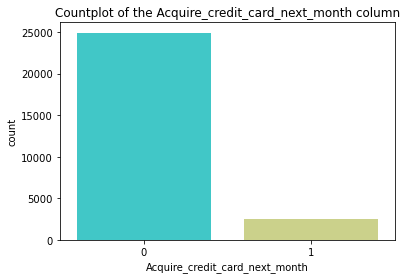

In [28]:
# Visualize the credit card distribution (Bar)
sns.countplot(df['Acquire_credit_card_next_month'],palette='rainbow')
plt.title("Countplot of the Acquire_credit_card_next_month column")
plt.show()

## Q2: Are customers who uses Paylah! more likely to acquire the new credit card?

<AxesSubplot:title={'center':'For customers who already use paylah, will they acquire a new credit card'}, ylabel='count'>

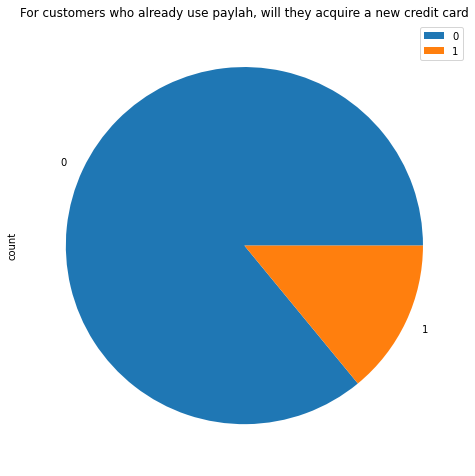

In [45]:
df_paylah = df.copy() 
df_paylah = df[['Acquire_credit_card_next_month','Holding_Paylah!']] 
df_if_more_paylah = df_paylah[df_paylah['Holding_Paylah!'] == 1 ] 
df_more_paylah_pie = df_if_more_paylah.groupby('Acquire_credit_card_next_month').size() .reset_index(name = 'count') 
 
df_more_paylah_pie.plot.pie(y = 'count', labels = df_more_paylah_pie['Acquire_credit_card_next_month'] , title = 'For customers who already use paylah, will they acquire a new credit card')



## Q3: Do customers who bought who acquire the new credit card spend more on dining?

NewCC:  [1705778.1668785918]
OldCC:  [9300321.793066597]


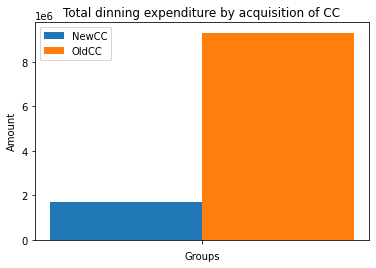

In [30]:
df_dinComp = df.copy()

# Retrieve only cust with new cc and get its sum
df_NewCC = df_dinComp[df_dinComp['Acquire_credit_card_next_month'] == 1]
df_NewCCSum = df_NewCC['Dining_Spend'].sum(axis=0)

# Retrieve only cust with no new cc and get its sum
df_OldCC = df_dinComp[df_dinComp['Acquire_credit_card_next_month'] == 0]
df_OldCCSum = df_OldCC['Dining_Spend'].sum(axis=0)


#X = ['NewCC','OldCC']
X = ['']
NewCC = [df_NewCCSum]
OldCC = [df_OldCCSum]
print("NewCC: ",NewCC)
print("OldCC: ",OldCC)
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, NewCC, 0.4, label = 'NewCC')
plt.bar(X_axis + 0.2, OldCC, 0.4, label = 'OldCC')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Amount")
plt.title("Total dinning expenditure by acquisition of CC")
plt.legend()
plt.show()

## Q4: What is the age distribution for customers acquiring a new credit card?

/Users/xenialu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


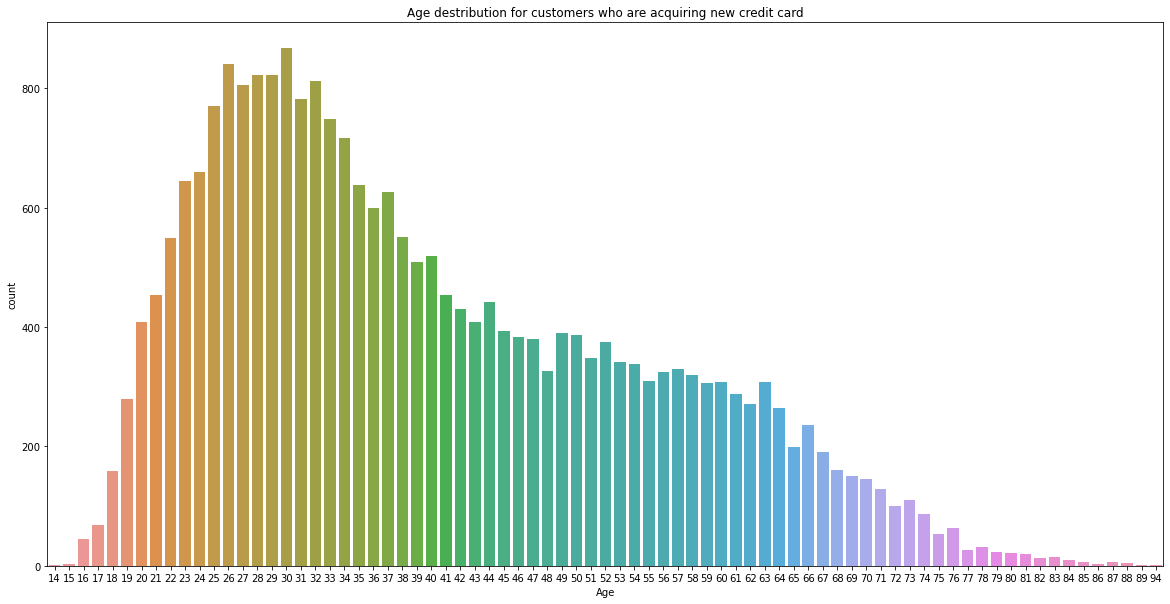

In [31]:
df_age = df.copy()

df_age = df_age[['Acquire_credit_card_next_month', 'Age']]

df_age = df_age[df_age['Acquire_credit_card_next_month'] == 0]

plt.figure(figsize=(20,10))
sns.countplot(df_age['Age'])
plt.title('Age destribution for customers who are acquiring new credit card')
plt.show()

## Q5: What is the spending pattern of the customers who is 25-31 year of age?

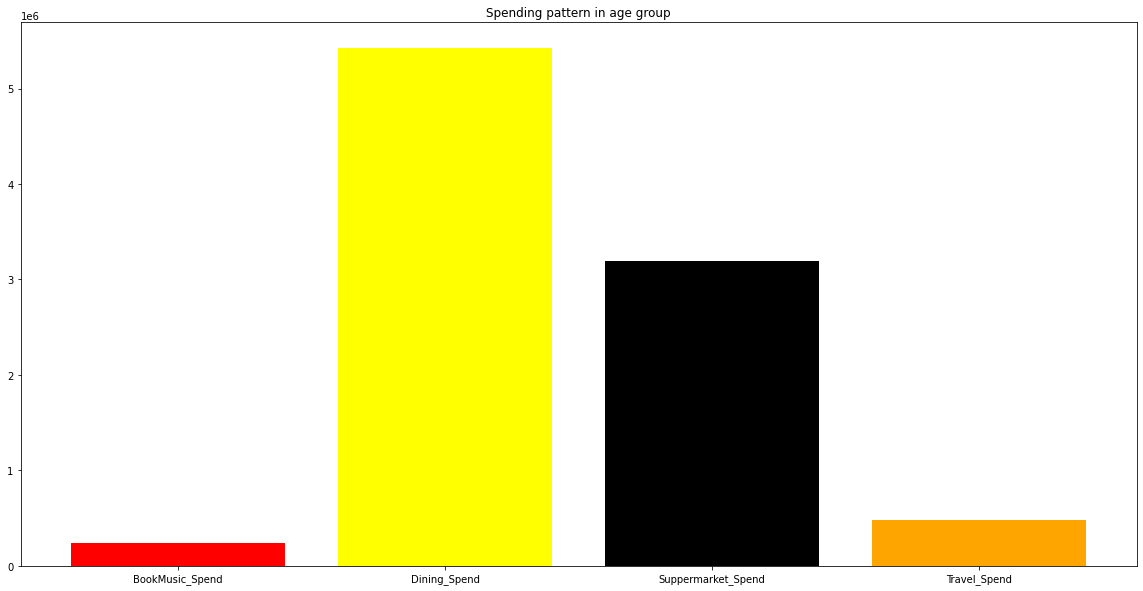

In [32]:
df_workingadults = df.copy() 
 
df_workingadults = df_workingadults[['Acquire_credit_card_next_month', 'Age', 'BookMusic_Spend', 'Dining_Spend', 'Suppermarket_Spend', 'Travel_Spend']] 
df_workingadults = df_workingadults[df_workingadults['Acquire_credit_card_next_month'] == 0] 
df_workingadults = df_workingadults[df_workingadults['Age'] >= 21 ] 
df_workingadults = df_workingadults[df_workingadults['Age'] <= 33 ] 
 
df_workingadults.loc['Total',:]= df_workingadults.sum(axis=0) 
 
df_workingadults = df_workingadults[['BookMusic_Spend', 'Dining_Spend', 'Suppermarket_Spend', 'Travel_Spend']] 
 
BookMusic_Spend = 244722.289163 
Dining_Spend = 5.422410e+06  
Suppermarket_Spend=   3.188666e+06 
Travel_Spend =  478673.184672 
# Libraries 

import numpy as np 
import matplotlib.pyplot as plt 



height = [244722.289163, 5.422410e+06 , 3.188666e+06, 478673.184672] 
bars = ('BookMusic_Spend', 'Dining_Spend', 'Suppermarket_Spend', 'Travel_Spend',) 
y_pos = np.arange(len(bars)) 

c = ['red', 'yellow','black', 'orange']

 
# Create bars 
plt.figure(figsize=(20,10))
plt.bar(y_pos, height,color=c) 
 
# Create names on the x-axis 
plt.xticks(y_pos, bars) 

#title 
plt.title('Spending pattern in age group') 
# Show graphic 
plt.show()

## Machine Learning Task: Predicting if a customer is likely to buy the new product

In this task, we will explore using machine learning models to predict if a customer is likely to buy the new product.

### Import the sklearn library

In [33]:
# import the data processing lib
from sklearn.model_selection import train_test_split

# for Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for KNN implementation
from sklearn.neighbors import KNeighborsClassifier

# import the evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Data preparation
We will perform the train-test split on the dataset

In [34]:
# Creating two dataframes df_features and df_target. 
# df_features contains all the important features which we use in our prediction
# df_target which contains the target variable

df_target = df['Acquire_credit_card_next_month']
df_features = df.drop(['Acquire_credit_card_next_month'],axis=1)

In [35]:
# Dummy encoding the feature(categorical) variables
df_dummy=pd.get_dummies(df_features,drop_first=True)

In [36]:
# Storing the features in X and the target in y variable
X = df_dummy
y = pd.DataFrame(df_target)

In [37]:
# Split data into train subset and validation subset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size = 0.20)

# Check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# Print dimension of validation set
print("X_valid",X_valid.shape)
print("y_valid",y_valid.shape)

X_train (21976, 33)
y_train (21976, 1)
X_valid (5494, 33)
y_valid (5494, 1)


# Training ML

In [38]:
# Decision tree
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)

# Test the DT classifier
y_pred = dtree.predict(X_valid)

# Displaying accuracy
asr = accuracy_score(y_pred, y_valid)
print(asr)

0.8370950127411722


In [39]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

# Test the kNN classifier
y_pred = knn.predict(X_valid)

# Find the accuracy score of the result
asr = accuracy_score(y_pred, y_valid)
print(asr)

/Users/xenialu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8849654168183473


# feature importance check

In [40]:
# Decision Tree
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(dtree.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,Monthly_Income,0.196359
10,Total_Asset,0.114482
15,Inflow_Transaction_Count,0.110661
12,Dining_Spend,0.100377
16,Non_financial_Transaction_Count,0.086226
13,Suppermarket_Spend,0.084368
0,Age,0.077797
1,Holding_Paylah!,0.044614
11,BookMusic_Spend,0.043349
14,Travel_Spend,0.020854


/Users/xenialu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best alpha using built-in LassoCV: 0.641618
Best score using built-in LassoCV: 0.053265
Lasso picked 5 variables and eliminated the other 28 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

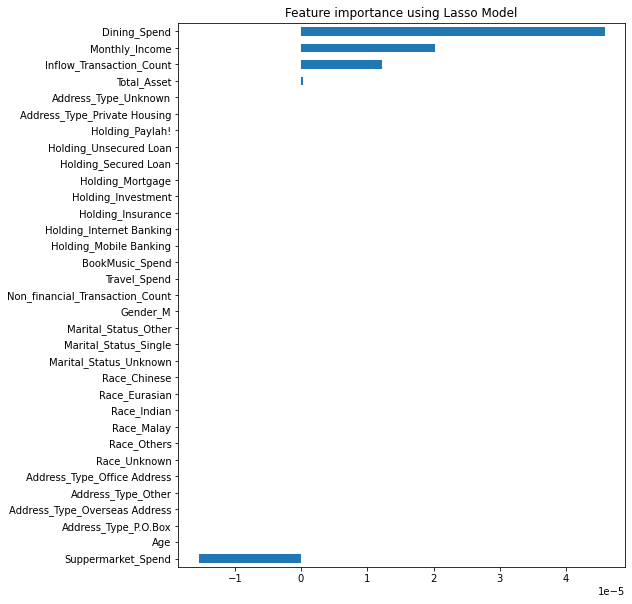

In [41]:
# KNN
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# hyperparameter tunning

In [42]:
# Decision Tree
# using gridsearch to improve the accuracy and variance of the model
dtree_test = DecisionTreeClassifier(max_features='auto', random_state=4)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 3, 4, 5, 6, 8, 10], 
              "min_samples_leaf" : [1, 2, 3, 4, 5, 10], 
              }

gs = GridSearchCV(estimator=dtree_test, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# KNN

param_grid = { "n_neighbors" : [3,5,11,19], 
              "weights": ["uniform", "distance"], 
              "metric" : ["euclidean","manhattan"], 
              }

gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

# Training new models

In [ ]:
# Decision Tree
dtree_updated = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_leaf=1)
dtree_updated.fit(X_train, y_train)

# Test the DT classifier
y_pred = dtree_updated.predict(X_valid)

# Displaying accuracy
asr = accuracy_score(y_pred, y_valid)
print(asr)

# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_valid)
print(cm)

# Displaying prediction
print(y_pred)

In [ ]:
# KNN
knn_updated = KNeighborsClassifier(metric="euclidean", n_neighbors=19, weights="uniform")
knn_updated.fit(X_train,y_train)

# Test the kNN classifier
y_pred = knn_updated.predict(X_valid)

# Test the DT classifier
y_pred = knn_updated.predict(X_valid)

# Displaying accuracy
asr = accuracy_score(y_pred, y_valid)
print(asr)

# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_valid)
print(cm)

# Displaying prediction
print(y_pred)